# 1. Import Library

In [396]:
# 1. IMPORT LIBRARY
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 2. LOAD DAN GABUNGKAN 4 DATASET

In [397]:
# 2. LOAD & COMBINE DATA
df1 = pd.read_csv('Sleep_health_lifestyle_dataset.csv')
df2 = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df3 = pd.read_csv('ss.csv')
df4 = pd.read_csv('Sleep_health_and_lifestyle_dataset2.csv')
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('Normal')

## menampilkan tampilan database setelah digabung sebanyak 5 baris


In [398]:
print("5 Baris Pertama Data:")
display(df.head())

5 Baris Pertama Data:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539,Normal
1,2,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754,Normal
2,3,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857,Normal
3,4,Male,29,Office Worker,8.3,10.0,20,10,Obese,124/72,55,6886,Normal
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945,Insomnia


### Informasi Umum Dataset

In [399]:
# 5. Informasi umum dataset
print("\nInformasi Dataset:")
df.info()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521 entries, 0 to 1520
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                1521 non-null   int64  
 1   Gender                   1521 non-null   object 
 2   Age                      1521 non-null   int64  
 3   Occupation               1521 non-null   object 
 4   Sleep Duration           1521 non-null   float64
 5   Quality of Sleep         1521 non-null   float64
 6   Physical Activity Level  1521 non-null   int64  
 7   Stress Level             1521 non-null   int64  
 8   BMI Category             1521 non-null   object 
 9   Blood Pressure           1521 non-null   object 
 10  Heart Rate               1521 non-null   int64  
 11  Daily Steps              1521 non-null   int64  
 12  Sleep Disorder           1521 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 154.6+ KB

### Statistik deskriptif data numerik


In [400]:
print("\nStatistik Deskriptif:")
display(df.describe())


Statistik Deskriptif:


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,1521.000000,1521.000000,1521.000000,1521.00000,1521.000000,1521.000000,1521.000000,1521.000000
mean,190.796187,41.585799,7.370546,6.99954,60.689678,5.409599,71.698882,7936.952005
std,110.107319,10.386702,1.458243,1.53302,24.488713,2.094451,8.888790,3605.762426
min,1.000000,18.000000,4.100000,1.00000,10.000000,1.000000,50.000000,2067.000000
25%,96.000000,33.000000,6.300000,6.00000,45.000000,4.000000,68.000000,5970.000000
50%,191.000000,42.000000,7.200000,7.00000,60.000000,5.000000,70.000000,7000.000000
75%,286.000000,50.000000,8.000000,8.00000,75.000000,7.000000,75.000000,8000.000000
max,400.000000,90.000000,12.000000,10.00000,120.000000,10.000000,100.000000,19958.000000


### Cek Nilai Kosong

In [401]:
print("\nCek Missing Values:")
display(df.isnull().sum())


Cek Missing Values:


,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


### Analisis kolom kategorikal terkait insomnia

In [402]:
# Hitung jumlah masing-masing kategori
insomnia_count = df[df['Sleep Disorder'].str.lower() == 'insomnia'].shape[0]
normal_count = df[df['Sleep Disorder'].str.lower() == 'normal'].shape[0]
sleep_apnea_count = df[df['Sleep Disorder'].str.lower() == 'sleep apnea'].shape[0]

# Hitung total data
total_count = df.shape[0]

# Tampilkan hasil
print("Jumlah data Insomnia    :", insomnia_count)
print("Jumlah data Normal      :", normal_count)
print("Jumlah data Sleep Apnea :", sleep_apnea_count)
print("Total data              :", total_count)

Jumlah data Insomnia    : 310
Jumlah data Normal      : 947
Jumlah data Sleep Apnea : 264
Total data              : 1521


### Hapus baris dengan Sleep Apnea

In [403]:
# Hapus Sleep Apnea
df = df[df['Sleep Disorder'].str.lower() != 'sleep apnea']

# Hitung ulang setelah Sleep Apnea dihapus
counts = df['Sleep Disorder'].value_counts()

# Buat tabel baru termasuk total
summary = counts.reset_index()
summary.columns = ['Sleep Disorder', 'Jumlah']

# Tambahkan baris total
total_row = pd.DataFrame([['Total', counts.sum()]], columns=summary.columns)
summary = pd.concat([summary, total_row], ignore_index=True)

# Tampilkan tabel distribusi + total di dalam display()
print("\nDistribusi Sleep Disorder (Termasuk Total):")
display(summary)


Distribusi Sleep Disorder (Termasuk Total):


,Sleep Disorder,Jumlah
0,Normal,947
1,Insomnia,310
2,Total,1257


### Korelasi antar fitur numerik

In [404]:
print("\nKorelasi Fitur Numerik:")
display(df.corr(numeric_only=True))


Korelasi Fitur Numerik:


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,1.000000,0.451159,0.133447,0.121455,-0.033360,-0.257792,-0.076488,0.007832
Age,0.451159,1.000000,0.144858,0.179212,-0.062246,-0.168395,-0.064661,-0.032107
Sleep Duration,0.133447,0.144858,1.000000,0.127049,0.184813,-0.169616,0.015443,0.138675
Quality of Sleep,0.121455,0.179212,0.127049,1.000000,0.005593,-0.354085,-0.197719,-0.181643
Physical Activity Level,-0.033360,-0.062246,0.184813,0.005593,1.000000,-0.061508,0.045476,0.285694
Stress Level,-0.257792,-0.168395,-0.169616,-0.354085,-0.061508,1.000000,0.233748,-0.013689
Heart Rate,-0.076488,-0.064661,0.015443,-0.197719,0.045476,0.233748,1.000000,0.149777
Daily Steps,0.007832,-0.032107,0.138675,-0.181643,0.285694,-0.013689,0.149777,1.000000


###Heatmap korelasi

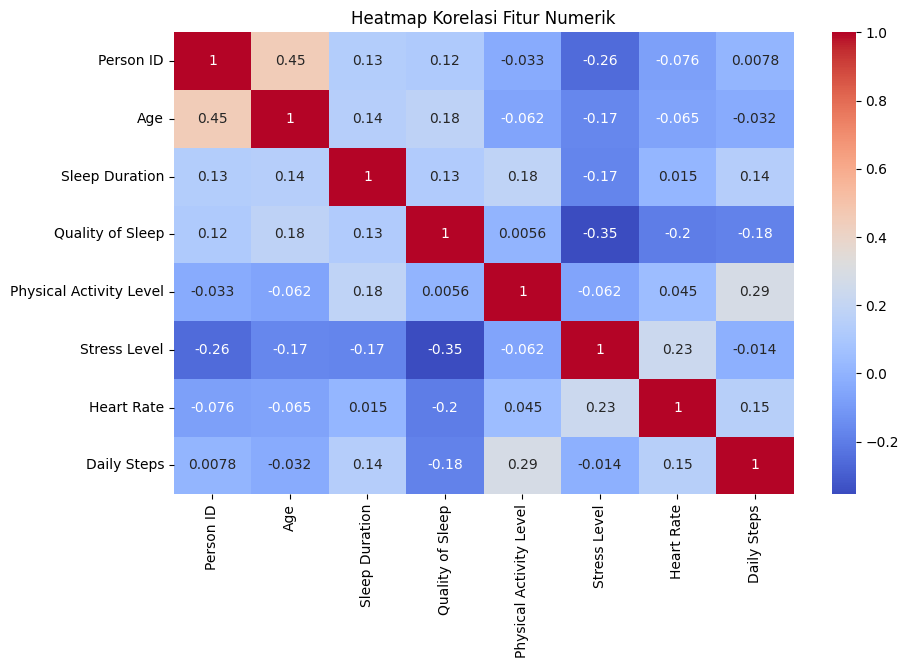

In [405]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

# 3. CLEANING

In [406]:
# Tampilkan info awal dan missing values
print("Informasi awal dataset:")
print(df.info())

Informasi awal dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 0 to 1506
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                1257 non-null   int64  
 1   Gender                   1257 non-null   object 
 2   Age                      1257 non-null   int64  
 3   Occupation               1257 non-null   object 
 4   Sleep Duration           1257 non-null   float64
 5   Quality of Sleep         1257 non-null   float64
 6   Physical Activity Level  1257 non-null   int64  
 7   Stress Level             1257 non-null   int64  
 8   BMI Category             1257 non-null   object 
 9   Blood Pressure           1257 non-null   object 
 10  Heart Rate               1257 non-null   int64  
 11  Daily Steps              1257 non-null   int64  
 12  Sleep Disorder           1257 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 137.5+ KB


In [407]:
df.drop(columns=['Person ID','Occupation'], inplace=True)
numerical_cols = df.select_dtypes(include='number').columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 0 to 1506
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   1257 non-null   object 
 1   Age                      1257 non-null   int64  
 2   Sleep Duration           1257 non-null   float64
 3   Quality of Sleep         1257 non-null   float64
 4   Physical Activity Level  1257 non-null   int64  
 5   Stress Level             1257 non-null   int64  
 6   BMI Category             1257 non-null   object 
 7   Blood Pressure           1257 non-null   object 
 8   Heart Rate               1257 non-null   int64  
 9   Daily Steps              1257 non-null   int64  
 10  Sleep Disorder           1257 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 117.8+ KB


In [408]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Is_Insomnia', data=df)
plt.title('Distribusi Kasus Insomnia vs Normal')
plt.xticks([0,1], ['Normal', 'Insomnia'])
plt.show()

ValueError: Could not interpret value `Is_Insomnia` for `x`. An entry with this name does not appear in `data`.

In [409]:
def remove_outliers_iqr(data, column):
    if not pd.api.types.is_numeric_dtype(data[column]):
        return data
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Terapkan untuk semua kolom numerik kecuali target
for col in numerical_cols:
    df = remove_outliers_iqr(df, col)

In [363]:
print("\nKorelasi Fitur Numerik:")
display(df.corr(numeric_only=True))


Korelasi Fitur Numerik:


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Age,1.000000,0.287302,0.397344,-0.168386,-0.408153,-0.330009,-0.260962
Sleep Duration,0.287302,1.000000,0.727541,0.322803,-0.592274,-0.452346,0.215503
Quality of Sleep,0.397344,0.727541,1.000000,0.181370,-0.744936,-0.529864,0.135971
Physical Activity Level,-0.168386,0.322803,0.181370,1.000000,-0.108629,0.075183,0.720892
Stress Level,-0.408153,-0.592274,-0.744936,-0.108629,1.000000,0.686169,-0.013793
Heart Rate,-0.330009,-0.452346,-0.529864,0.075183,0.686169,1.000000,0.046255
Daily Steps,-0.260962,0.215503,0.135971,0.720892,-0.013793,0.046255,1.000000


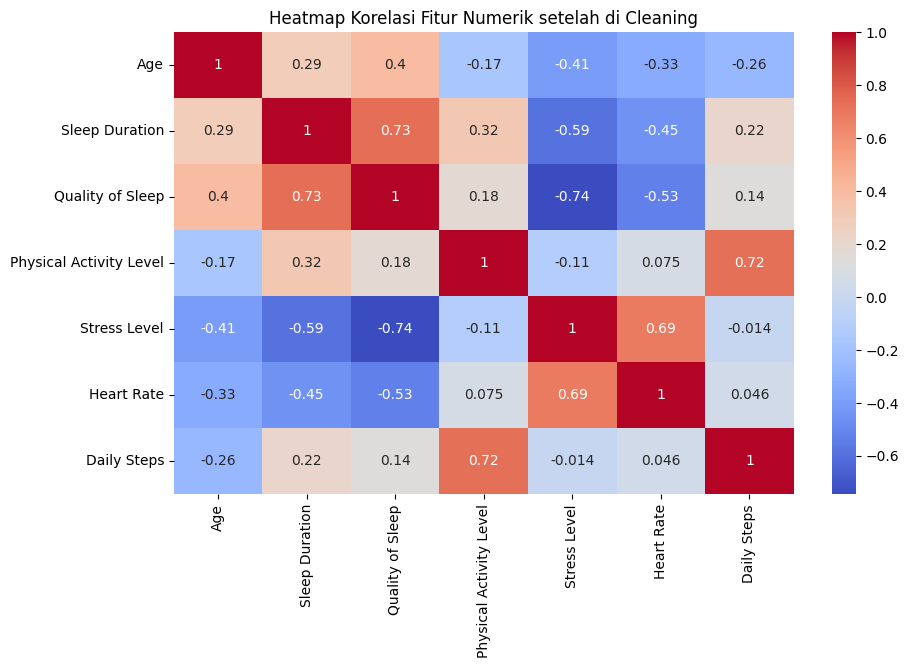

In [410]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur Numerik setelah di Cleaning")
plt.show()

# 4. Prapemrosesan Label & Fitur Kategorikal

In [411]:
df['Is_Insomnia'] = (df['Sleep Disorder'] == 'Insomnia').astype(int)
df.drop(columns=['Sleep Disorder'], inplace=True)

# Cek hasil
print("Distribusi Kategori untuk Kasus Non-Insomnia(0) vs Insomnia(1):")
print(df['Is_Insomnia'].value_counts().sort_index())

Distribusi Kategori untuk Kasus Non-Insomnia(0) vs Insomnia(1):
Is_Insomnia
0    692
1    227
Name: count, dtype: int64


### Pisahkan tekanan darah

In [412]:
# Pisahkan tekanan darah menjadi sistolik dan diastolik
if 'Blood Pressure' in df.columns:
    # Pisahkan Systolic dan Diastolic
    df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)

    # Drop kolom aslinya setelah diproses
    df.drop(columns=['Blood Pressure'], inplace=True)

print("\nContoh Pemisahan Blood Pressure:")
print(df[['Systolic', 'Diastolic']].tail())


Contoh Pemisahan Blood Pressure:
      Systolic  Diastolic
1488     118.0       75.0
1489     118.0       75.0
1490     140.0       95.0
1505     140.0       95.0
1506     140.0       95.0


### Ubah gender dari object ke float

In [413]:
df['Gender'] = df['Gender'].map({'Female': 0.0, 'Male': 1.0})

# Cek hasil konversi
print(df['Gender'].value_counts())
print(df['Gender'].dtype)

Gender
1.0    546
0.0    373
Name: count, dtype: int64
float64


In [414]:
# Fitur tambahan
df['Sleep_Efficiency'] = df['Sleep Duration'] / 24
df['Stress_Sleep_Interaction'] = df['Stress Level'] * df['Quality of Sleep']
df['Activity_Efficiency'] = df['Daily Steps'] / (df['Physical Activity Level'] + 1)
df['Stress_Sleep_Ratio'] = df['Stress Level'] / (df['Quality of Sleep'] + 1)
df['Sleep_Age_Ratio'] = df['Sleep Duration'] / (df['Age'] + 1)


### Ubah kategori BMI ke nilai numerik

In [415]:
df['BMI Category'] = df['BMI Category'].str.strip().str.lower()
bmi_mapping = {
    'normal': 0,
    'normal weight': 0,
    'overweight': 1,
    'obese': 2,
    'underweight': 0
}
df['BMI Category'] = df['BMI Category'].map(bmi_mapping)


In [416]:
# 5. SPLIT X, y
X = df.drop('Is_Insomnia', axis=1)
y = df['Is_Insomnia']

print("Missing Values Sebelum SMOTE:")
print(X.isnull().sum())


Missing Values Sebelum SMOTE:
Gender                      0
Age                         0
Sleep Duration              0
Quality of Sleep            0
Physical Activity Level     0
Stress Level                0
BMI Category                0
Heart Rate                  0
Daily Steps                 0
Systolic                    0
Diastolic                   0
Sleep_Efficiency            0
Stress_Sleep_Interaction    0
Activity_Efficiency         0
Stress_Sleep_Ratio          0
Sleep_Age_Ratio             0
dtype: int64


In [417]:
print("\nTipe Data Sebelum SMOTE:")
print(X.dtypes)


Tipe Data Sebelum SMOTE:
Gender                      float64
Age                           int64
Sleep Duration              float64
Quality of Sleep            float64
Physical Activity Level       int64
Stress Level                  int64
BMI Category                  int64
Heart Rate                    int64
Daily Steps                   int64
Systolic                    float64
Diastolic                   float64
Sleep_Efficiency            float64
Stress_Sleep_Interaction    float64
Activity_Efficiency         float64
Stress_Sleep_Ratio          float64
Sleep_Age_Ratio             float64
dtype: object


In [420]:
# prompt: coba saya mau menampilkan isi datanya setelah variable nyadiubah menjadi seperti diatas

print("\nData setelah Prapemrosesan:")
display(df.head())
print("\nShape Data setelah Prapemrosesan:", df.shape)


Data setelah Prapemrosesan:


,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Is_Insomnia,Systolic,Diastolic,Sleep_Efficiency,Stress_Sleep_Interaction,Activity_Efficiency,Stress_Sleep_Ratio,Sleep_Age_Ratio
2,1.0,44,6.1,6.0,107,4,0,81,2857,0,122.0,70.0,0.254167,24.0,26.453704,0.571429,0.135556
14,0.0,52,4.9,5.0,87,10,0,77,6251,0,126.0,81.0,0.204167,50.0,71.034091,1.666667,0.092453
20,0.0,38,5.7,9.4,53,3,2,76,3230,0,129.0,75.0,0.237500,28.2,59.814815,0.288462,0.146154
34,0.0,47,5.3,4.9,22,3,0,72,7710,1,123.0,72.0,0.220833,14.7,335.217391,0.508475,0.110417
36,0.0,27,4.7,5.9,17,10,0,81,5191,0,113.0,76.0,0.195833,59.0,288.388889,1.449275,0.167857



Shape Data setelah Prapemrosesan: (919, 17)


In [424]:
# Mapping BMI Category dari teks ke angka
bmi_mapping = {
    'Normal': 0,
    'Normal Weight': 0,
    'Overweight': 1,
    'Obese': 2,
    'Underweight': 0
}

# Konversi isi BMI Category menjadi lowercase dan hilangkan spasi (opsional)
X_train['BMI Category'] = X_train['BMI Category'].str.strip()

# Mapping nilai teks menjadi angka
X_train['BMI Category'] = X_train['BMI Category'].map(bmi_mapping)

# Jika ada missing values setelah mapping (misalnya ada nilai tak dikenali), isi default 0
X_train['BMI Category'] = X_train['BMI Category'].fillna(0).astype(float)


print(X_train.dtypes)
print(X_train.head())

Gender                      float64
Age                           int64
Sleep Duration              float64
Quality of Sleep            float64
Physical Activity Level       int64
Stress Level                  int64
BMI Category                float64
Heart Rate                    int64
Daily Steps                   int64
Systolic                    float64
Diastolic                   float64
Sleep_Efficiency            float64
Stress_Sleep_Interaction    float64
Activity_Efficiency         float64
Stress_Sleep_Ratio          float64
Sleep_Age_Ratio             float64
dtype: object
      Gender  Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
908      1.0   38             7.3               8.0                       60   
1333     0.0   43             6.7               7.0                       45   
219      1.0   47             8.5               9.3                       84   
448      1.0   31             7.7               7.0                       75   
75       0

In [425]:
from imblearn.over_sampling import SMOTE

# Lakukan SMOTE setelah fitur kategori dikonversi
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Training ulang
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [428]:
# 7. SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [429]:
# 8. TRAINING DENGAN GRIDSEARCH
model = RandomForestClassifier(random_state=42, class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1')
grid_search.fit(X_train_resampled, y_train_resampled) # Use resampled data for training
best_model = grid_search.best_estimator_

print("Training selesai!")
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Training selesai!
Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [431]:
# 9. EVALUASI INTERNAL
y_pred = best_model.predict(X_test)
print("\n=== EVALUASI DATA TRAINING SPLIT (Internal Data) ===")
print("Akurasi : {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


=== EVALUASI DATA TRAINING SPLIT (Internal Data) ===
Akurasi : 95.65%

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       140
           1       0.95      0.86      0.90        44

    accuracy                           0.96       184
   macro avg       0.95      0.92      0.94       184
weighted avg       0.96      0.96      0.96       184

Confusion Matrix:
 [[138   2]
 [  6  38]]


In [432]:
# prompt: sekarang saya mau mendownload mode ke joblib dengan nama insomnia saja

import joblib

# Simpan model terbaik ke file joblib
joblib.dump(best_model, 'insomnia.joblib')

print("Model terbaik telah disimpan sebagai insomnia.joblib")

Model terbaik telah disimpan sebagai insomnia.joblib


## Statistik deskriptif data numerik

In [ ]:
print("\nStatistik Deskriptif:")
display(df.describe())


Statistik Deskriptif:


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,1521.000000,1521.000000,1521.000000,1521.00000,1521.000000,1521.000000,1521.000000,1521.000000
mean,190.796187,41.585799,7.370546,6.99954,60.689678,5.409599,71.698882,7936.952005
std,110.107319,10.386702,1.458243,1.53302,24.488713,2.094451,8.888790,3605.762426
min,1.000000,18.000000,4.100000,1.00000,10.000000,1.000000,50.000000,2067.000000
25%,96.000000,33.000000,6.300000,6.00000,45.000000,4.000000,68.000000,5970.000000
50%,191.000000,42.000000,7.200000,7.00000,60.000000,5.000000,70.000000,7000.000000
75%,286.000000,50.000000,8.000000,8.00000,75.000000,7.000000,75.000000,8000.000000
max,400.000000,90.000000,12.000000,10.00000,120.000000,10.000000,100.000000,19958.000000


## Cek nilai kosong

In [ ]:
print("\nCek Missing Values:")
display(df.isnull().sum())


Cek Missing Values:


,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


### Analisis kolom kategorikal terkait insomnia

In [ ]:
# Pastikan NaN sudah diisi agar aman
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('Normal')

# Hitung jumlah masing-masing kategori
insomnia_count = df[df['Sleep Disorder'].str.lower() == 'insomnia'].shape[0]
normal_count = df[df['Sleep Disorder'].str.lower() == 'normal'].shape[0]
sleep_apnea_count = df[df['Sleep Disorder'].str.lower() == 'sleep apnea'].shape[0]

# Hitung total data
total_count = df.shape[0]

# Tampilkan hasil
print("Jumlah data Insomnia    :", insomnia_count)
print("Jumlah data Normal      :", normal_count)
print("Jumlah data Sleep Apnea :", sleep_apnea_count)
print("Total data              :", total_count)


Jumlah data Insomnia    : 310
Jumlah data Normal      : 947
Jumlah data Sleep Apnea : 264
Total data              : 1521


In [ ]:
# Hapus baris dengan Sleep Apnea
df = df[df['Sleep Disorder'].str.lower() != 'sleep apnea']

# Cek hasilnya
print("Jumlah data setelah Sleep Apnea dihapus:", df.shape[0])
print(df['Sleep Disorder'].value_counts())

Jumlah data setelah Sleep Apnea dihapus: 1257
Sleep Disorder
Normal      947
Insomnia    310
Name: count, dtype: int64


In [ ]:
# Korelasi antar fitur numerik
print("\nKorelasi Fitur Numerik:")
display(df.corr(numeric_only=True))


Korelasi Fitur Numerik:


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,1.000000,0.451159,0.133447,0.121455,-0.033360,-0.257792,-0.076488,0.007832
Age,0.451159,1.000000,0.144858,0.179212,-0.062246,-0.168395,-0.064661,-0.032107
Sleep Duration,0.133447,0.144858,1.000000,0.127049,0.184813,-0.169616,0.015443,0.138675
Quality of Sleep,0.121455,0.179212,0.127049,1.000000,0.005593,-0.354085,-0.197719,-0.181643
Physical Activity Level,-0.033360,-0.062246,0.184813,0.005593,1.000000,-0.061508,0.045476,0.285694
Stress Level,-0.257792,-0.168395,-0.169616,-0.354085,-0.061508,1.000000,0.233748,-0.013689
Heart Rate,-0.076488,-0.064661,0.015443,-0.197719,0.045476,0.233748,1.000000,0.149777
Daily Steps,0.007832,-0.032107,0.138675,-0.181643,0.285694,-0.013689,0.149777,1.000000


### Heatmap korelasi



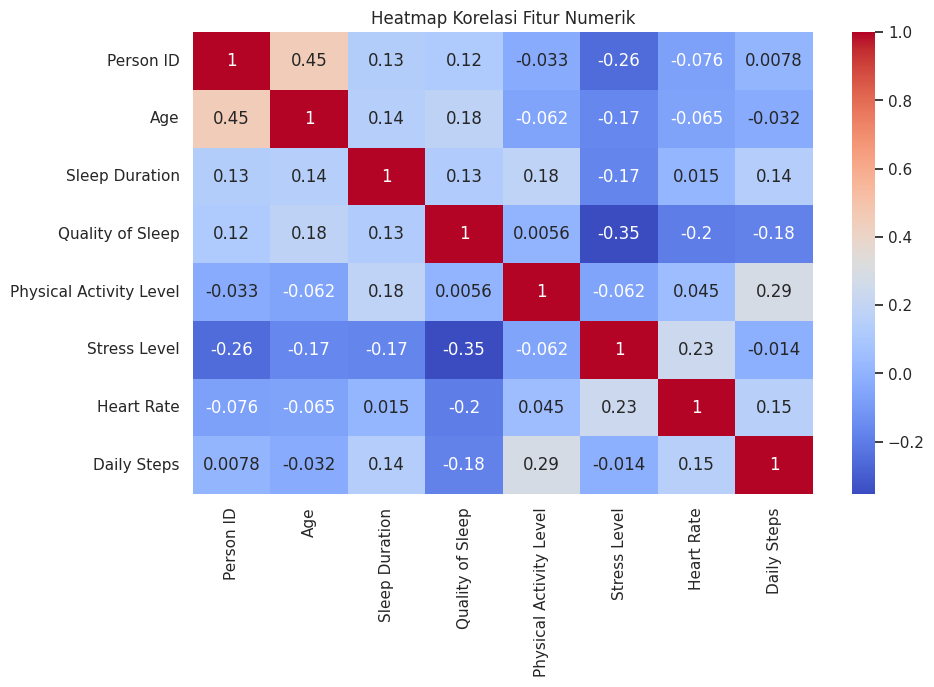

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

### Tampilkan info awal dan missing values

In [ ]:
print("Informasi awal dataset:")
print(df.info())

Informasi awal dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 0 to 1506
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                1257 non-null   int64  
 1   Gender                   1257 non-null   object 
 2   Age                      1257 non-null   int64  
 3   Occupation               1257 non-null   object 
 4   Sleep Duration           1257 non-null   float64
 5   Quality of Sleep         1257 non-null   float64
 6   Physical Activity Level  1257 non-null   int64  
 7   Stress Level             1257 non-null   int64  
 8   BMI Category             1257 non-null   object 
 9   Blood Pressure           1257 non-null   object 
 10  Heart Rate               1257 non-null   int64  
 11  Daily Steps              1257 non-null   int64  
 12  Sleep Disorder           1257 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 137.5+ KB


In [ ]:
df.drop(columns=['Person ID','Occupation'], inplace=True)
numerical_cols = df.select_dtypes(include='number').columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 0 to 1506
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   1257 non-null   object 
 1   Age                      1257 non-null   int64  
 2   Sleep Duration           1257 non-null   float64
 3   Quality of Sleep         1257 non-null   float64
 4   Physical Activity Level  1257 non-null   int64  
 5   Stress Level             1257 non-null   int64  
 6   BMI Category             1257 non-null   object 
 7   Blood Pressure           1257 non-null   object 
 8   Heart Rate               1257 non-null   int64  
 9   Daily Steps              1257 non-null   int64  
 10  Sleep Disorder           1257 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 117.8+ KB


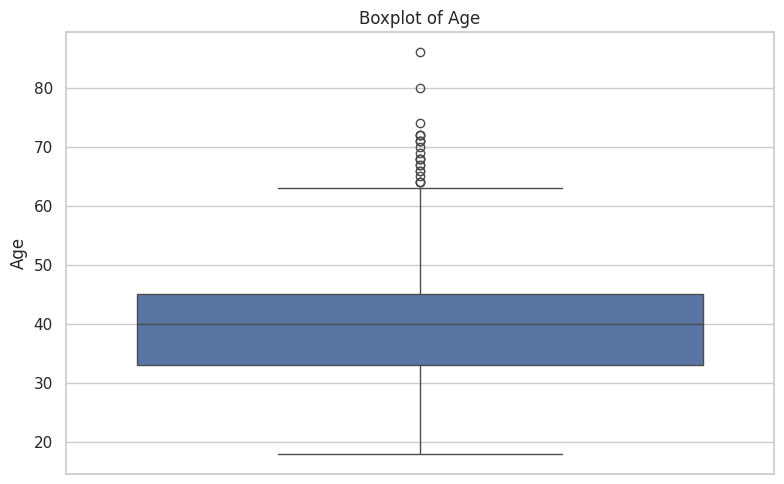

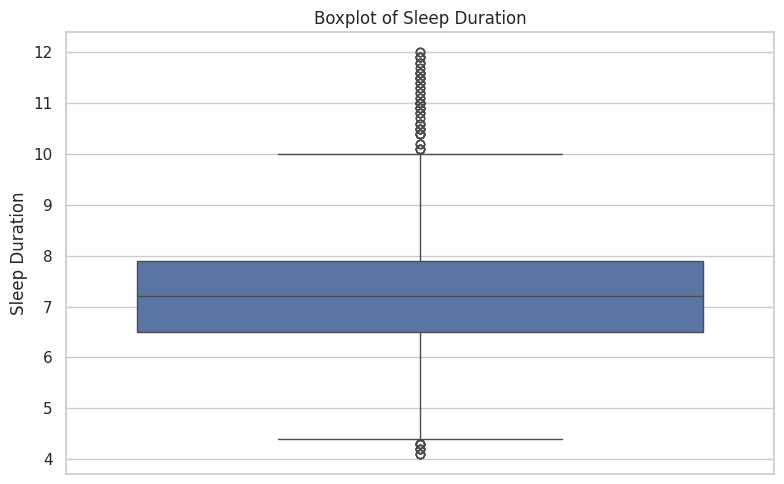

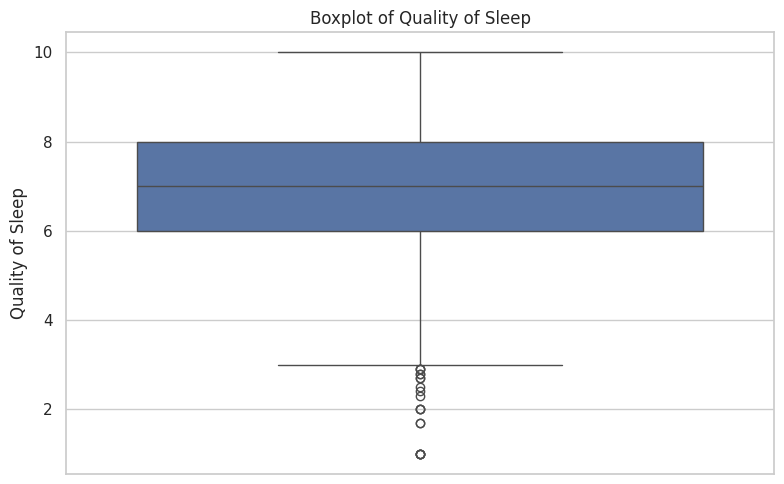

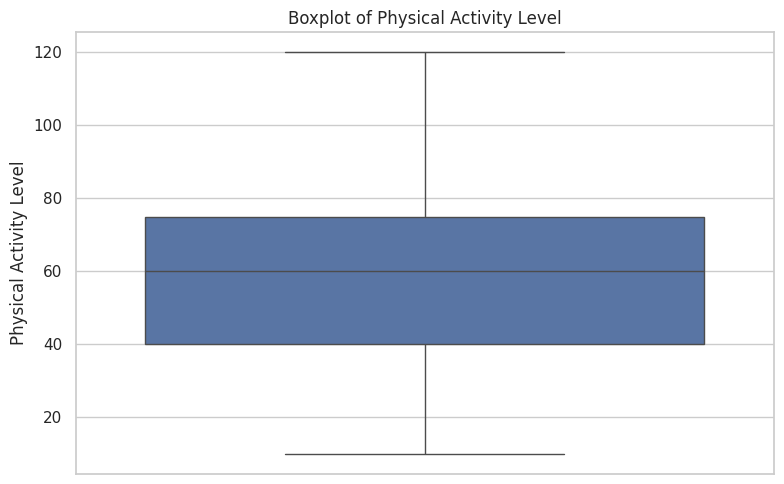

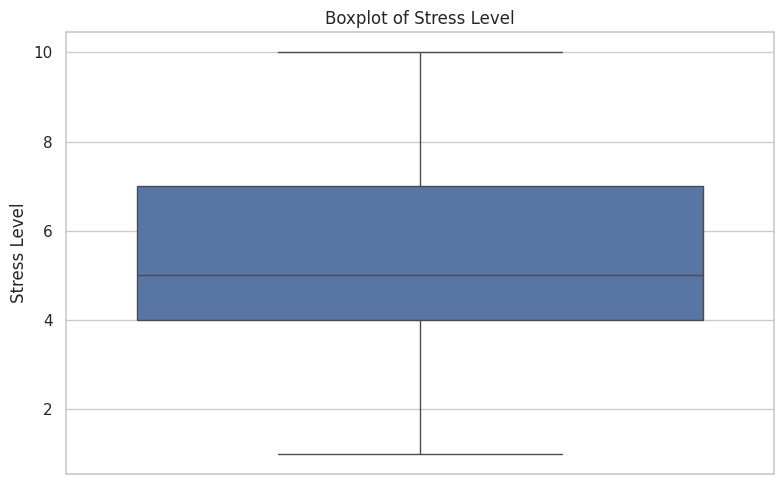

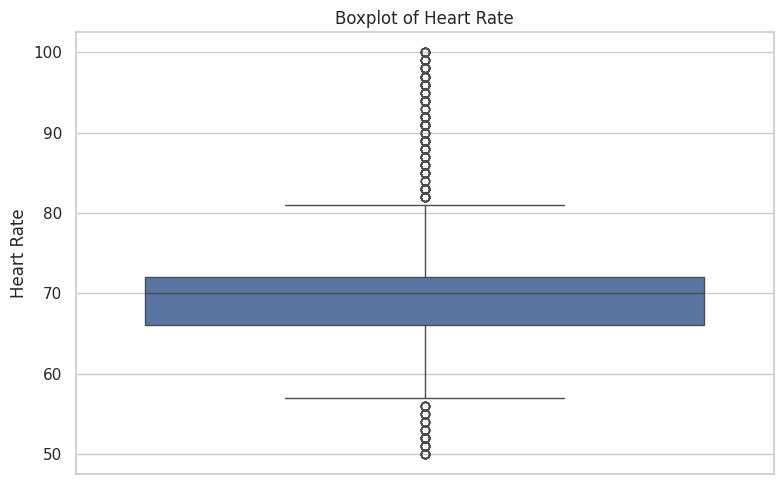

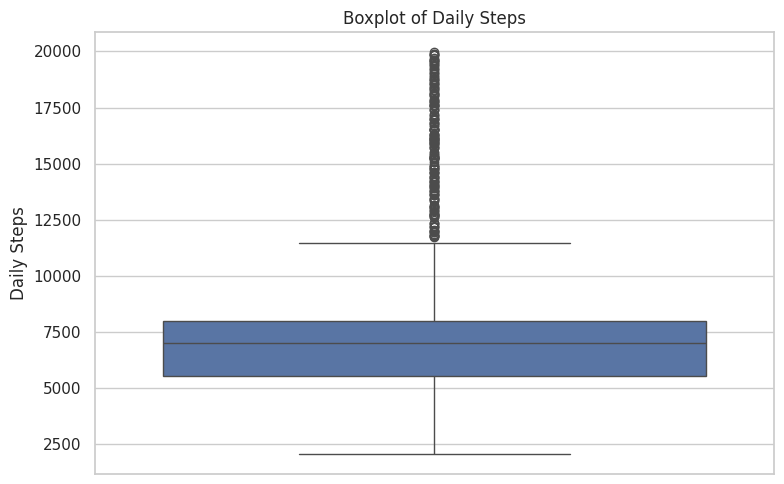

In [ ]:
# Set style visual
sns.set(style="whitegrid")

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [ ]:
def remove_outliers_iqr(data, column):
    if not pd.api.types.is_numeric_dtype(data[column]):
        return data
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Terapkan untuk semua kolom numerik kecuali target
for col in numerical_cols:
    df = remove_outliers_iqr(df, col)

### Heatmap korelasi

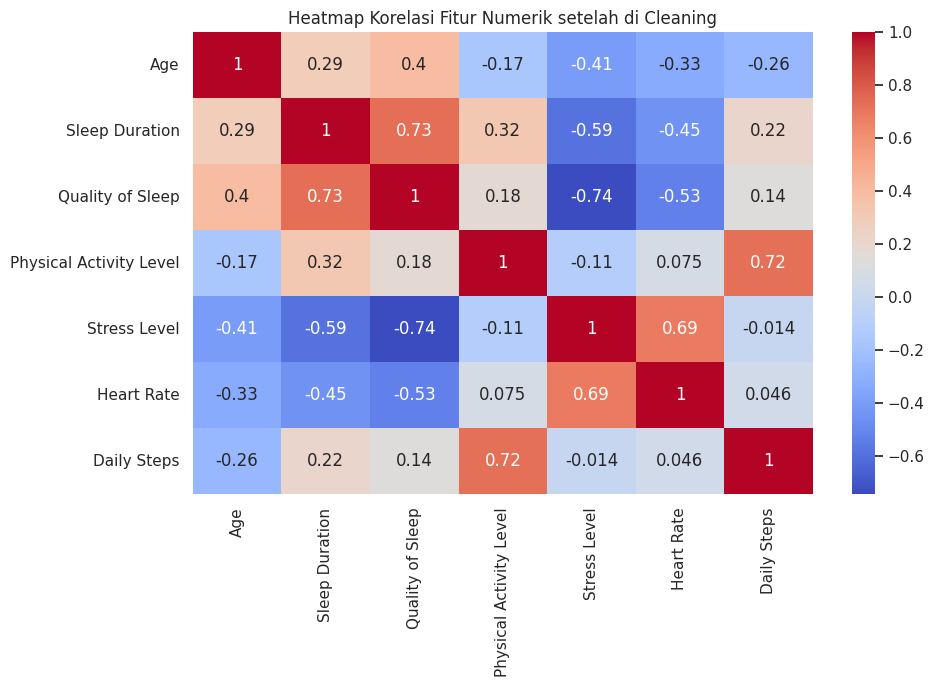

In [ ]:
# 12. Heatmap korelasi
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur Numerik setelah di Cleaning")
plt.show()

## Konstruksi Data

In [ ]:
df['Is_Insomnia'] = (df['Sleep Disorder'] == 'Insomnia').astype(int)
df.drop(columns=['Sleep Disorder'], inplace=True)

# Cek hasil
print("Distribusi Kategori untuk Kasus Non-Insomnia(0) vs Insomnia(1):")
print(df['Is_Insomnia'].value_counts().sort_index())

Distribusi Kategori untuk Kasus Non-Insomnia(0) vs Insomnia(1):
Is_Insomnia
0    692
1    227
Name: count, dtype: int64


### Pisahkan tekanan darah menjadi sistolik dan diastolik

In [ ]:
# Pisahkan tekanan darah menjadi sistolik dan diastolik
if 'Blood Pressure' in df.columns:
    # Pisahkan Systolic dan Diastolic
    df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)

    # Drop kolom aslinya setelah diproses
    df.drop(columns=['Blood Pressure'], inplace=True)

print("\nContoh Pemisahan Blood Pressure:")
print(df[['Systolic', 'Diastolic']].tail())


Contoh Pemisahan Blood Pressure:
      Systolic  Diastolic
1488     118.0       75.0
1489     118.0       75.0
1490     140.0       95.0
1505     140.0       95.0
1506     140.0       95.0


### Ubah gender dari object ke float

In [ ]:

df['Gender'] = df['Gender'].map({'Female': 0.0, 'Male': 1.0})

# Cek hasil konversi
print(df['Gender'].value_counts())
print(df['Gender'].dtype)

Gender
1.0    546
0.0    373
Name: count, dtype: int64
float64


### Mapping kategori BMI ke nilai numerik

In [ ]:
bmi_mapping = {
    'Normal': 0,
    'Normal Weight': 0,
    'Overweight': 1,
    'Obese': 2,
    'Underweight': 0   # Jika ingin membedakan
}


In [ ]:
df['Sleep_Efficiency'] = df['Sleep Duration'] / 24
df['Stress_Sleep_Interaction'] = df['Stress Level'] * df['Quality of Sleep']
df['Activity_Efficiency'] = df['Daily Steps'] / (df['Physical Activity Level'] + 1)
df['Stress_Sleep_Ratio'] = df['Stress Level'] / (df['Quality of Sleep'] + 1)
df['Sleep_Age_Ratio'] = df['Sleep Duration'] / (df['Age'] + 1)

In [ ]:
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Is_Insomnia,Systolic,Diastolic,Sleep_Efficiency,Stress_Sleep_Interaction,Activity_Efficiency,Stress_Sleep_Ratio,Sleep_Age_Ratio
2,1.0,44,6.1,6.0,107,4,Underweight,81,2857,0,122.0,70.0,0.254167,24.0,26.453704,0.571429,0.135556
14,0.0,52,4.9,5.0,87,10,Underweight,77,6251,0,126.0,81.0,0.204167,50.0,71.034091,1.666667,0.092453
20,0.0,38,5.7,9.4,53,3,Obese,76,3230,0,129.0,75.0,0.237500,28.2,59.814815,0.288462,0.146154
34,0.0,47,5.3,4.9,22,3,Underweight,72,7710,1,123.0,72.0,0.220833,14.7,335.217391,0.508475,0.110417
36,0.0,27,4.7,5.9,17,10,Normal,81,5191,0,113.0,76.0,0.195833,59.0,288.388889,1.449275,0.167857


In [ ]:
display(df.isnull().sum())

,0
Gender,0
Age,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Heart Rate,0
Daily Steps,0
Is_Insomnia,0


In [ ]:
# 4. SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Ubah fitur kategorikal ke numerik
X = pd.get_dummies(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Random Forest
model = RandomForestClassifier(random_state=42)

# Buat parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Buat GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Jalankan grid search
grid_search.fit(X_train, y_train)
print("Training model selesai!")
print("Best Parameters:", grid_search.best_params_)

# Evaluasi model
y_pred = grid_search.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Training model selesai!
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.8918032786885246


=== EVALUASI DATA TRAINING SPLIT ===
Akurasi Data Test Split : 89.18%

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       240
           1       0.88      0.57      0.69        65

    accuracy                           0.89       305
   macro avg       0.89      0.77      0.81       305
weighted avg       0.89      0.89      0.88       305

Confusion Matrix:
 [[235   5]
 [ 28  37]]


=== EVALUASI DATA UJI EKSTERNAL (uji5.csv) ===
Akurasi Data Uji : 56.00%

Classification Report (Data Uji):
               precision    recall  f1-score   support

           0       0.56      1.00      0.72        14
           1       0.00      0.00      0.00        11

    accuracy                           0.56        25
   macro avg       0.28      0.50      0.36        25
weighted avg       0.31      0.56      0.40        25

Confusion Matrix (Data Uji):
 [[14  0]
 [11  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
